In [1]:
import pandas as pd
import numpy as np

from scipy.spatial.distance import cdist
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

import matplotlib.pyplot as plt

In [2]:
# Import `clustfeatimp` module
import sys
sys.path.append('../myenv/src/clustfeatimp/src')

import clustfeatimp as cfi

In [3]:
# Read the data
X = pd.read_csv('../data/wine.txt')
X

,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
174,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
175,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
176,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840


In [4]:
# Scale features for clustering
scaler = StandardScaler()
scaler.fit(X)
X = scaler.transform(X)

X = pd.DataFrame(X, columns=scaler.feature_names_in_)
X

,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,1.518613,-0.562250,0.232053,-1.169593,1.913905,0.808997,1.034819,-0.659563,1.224884,0.251717,0.362177,1.847920,1.013009
1,0.246290,-0.499413,-0.827996,-2.490847,0.018145,0.568648,0.733629,-0.820719,-0.544721,-0.293321,0.406051,1.113449,0.965242
2,0.196879,0.021231,1.109334,-0.268738,0.088358,0.808997,1.215533,-0.498407,2.135968,0.269020,0.318304,0.788587,1.395148
3,1.691550,-0.346811,0.487926,-0.809251,0.930918,2.491446,1.466525,-0.981875,1.032155,1.186068,-0.427544,1.184071,2.334574
4,0.295700,0.227694,1.840403,0.451946,1.281985,0.808997,0.663351,0.226796,0.401404,-0.319276,0.362177,0.449601,-0.037874
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,0.876275,2.974543,0.305159,0.301803,-0.332922,-0.985614,-1.424900,1.274310,-0.930179,1.142811,-1.392758,-1.231206,-0.021952
174,0.493343,1.412609,0.414820,1.052516,0.158572,-0.793334,-1.284344,0.549108,-0.316950,0.969783,-1.129518,-1.485445,0.009893
175,0.332758,1.744744,-0.389355,0.151661,1.422412,-1.129824,-1.344582,0.549108,-0.422075,2.224236,-1.612125,-1.485445,0.280575
176,0.209232,0.227694,0.012732,0.151661,1.422412,-1.033684,-1.354622,1.354888,-0.229346,1.834923,-1.568252,-1.400699,0.296498


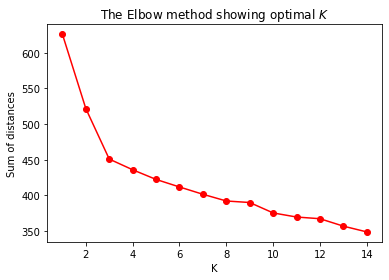

In [5]:
# Find best K and plot elbow method
distsum = []
for k in range(1,15):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(X)
    distsum.append(sum(np.min(cdist(X, kmeans.cluster_centers_, 'euclidean'), axis=1)))

plt.plot(range(1,15), distsum, 'ro-')
plt.xlabel('K')
plt.ylabel('Sum of distances')
plt.title('The Elbow method showing optimal $K$')
plt.show()

In [6]:
# Clustering with KMeans and K=3
kmeans = KMeans(n_clusters=3, random_state=25)
kmeans.fit(X)

KMeans(n_clusters=3, random_state=25)

In [7]:
# Assign cluster values to the variable y
y = kmeans.labels_

In [8]:
# Create ClusteringExplainer object
clust_explnr = cfi.ClusteringExplainer()

# Fit to the data
clust_explnr.fit(X, y)

Model balanced accuracy: 0.9843672456575683


In [9]:
# Feature importance for clustering variables
print('--- Feature Importance for KMeans clustering ---')
print(clust_explnr.feature_importance)

--- Feature Importance for KMeans clustering ---
{'OD280/OD315 of diluted wines': 41.16386413574219, 'Proline': 25.576091766357422, 'Color intensity': 21.526384353637695, 'Alcohol': 14.563386917114258, 'Flavanoids': 14.188920974731445, 'Hue': 13.341002464294434}


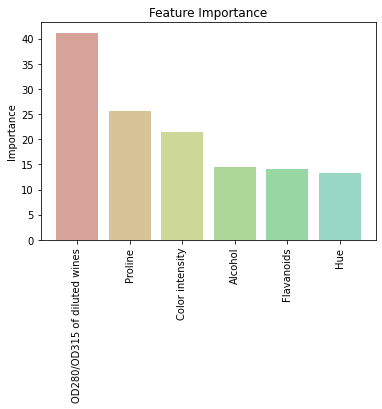

In [10]:
# Plot with feature importance
clust_explnr.plot_importances()

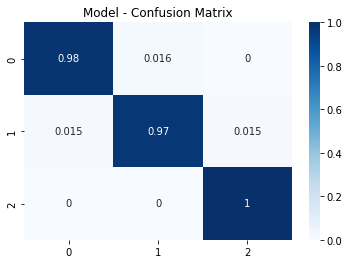

In [11]:
## Plot with confusion matrix to validate model quality
clust_explnr.plot_conf_matrix()

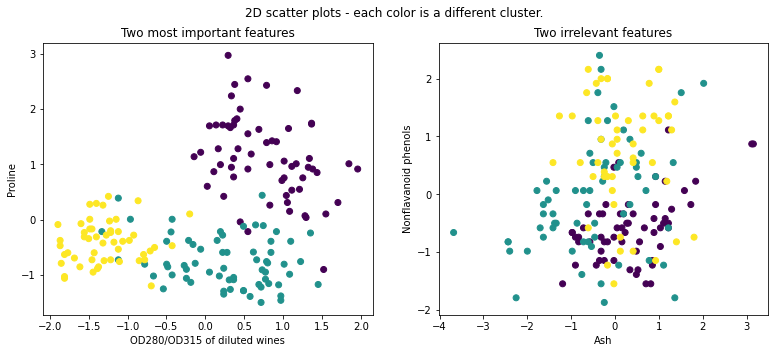

In [12]:
# 2D scatter plots. Each color is a different cluster.
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(13, 5))
fig.suptitle('2D scatter plots - each color is a different cluster.')
ax1.scatter(X['OD280/OD315 of diluted wines'], X['Proline'], c=y)
ax1.set(xlabel='OD280/OD315 of diluted wines', ylabel='Proline')
ax1.set_title('Two most important features')
ax2.scatter(X['Ash'], X['Nonflavanoid phenols'], c=y)
ax2.set(xlabel='Ash', ylabel='Nonflavanoid phenols')
ax2.set_title('Two irrelevant features')
plt.show()

# First plot:
# You can see a clear division into 3 segments with these two variables.
# Second plot:
# It is not possible to make a clear clustering into 3 segments when using these two variables.